In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch

from torchvision import datasets
data_path = 'data/ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # 훈련데이터용 다운로드. 없으면 토치비전이 다운로드함
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # train이 False로 되어있으면 검증용 데이터를 얻을 수 있다.

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/ch7/cifar-10-python.tar.gz to data/ch7/
Files already downloaded and verified


# 7.1

torch.utils.data.Dataset에서 데이터셋에는 \_\_len\_\_메소드와 \_\_getitem\_\_메소드가 구현되어있다. 개별 아이템에 접근할때는 표준 서브스크립틍 해당하는 색인용 튜플과 리스트를 사용할 수 있다.

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

img,label=cifar10[99]
img,label,class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F1570C78550>,
 1,
 'automobile')

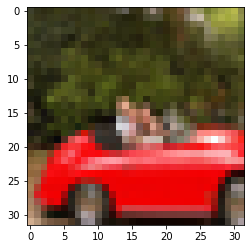

In [3]:
plt.imshow(img)
plt.show()

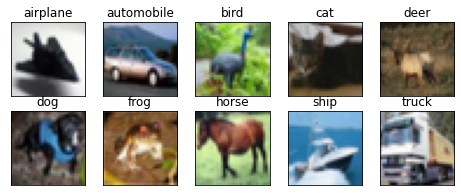

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [5]:
# 이미지를 파이토치 텐서로 변환
from torchvision import transforms #이 모듈은 재구성 가능 함수형태의 여러 객체들을 정의하고 있어서 CIFAR10같은 torchvision데이터셋에 인자로 전달가능하고 로드후에 __getitem__이 결과를 변환하기에 앞서 변환을 수행함 
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [6]:
to_tensor=transforms.ToTensor()
img_t=to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [7]:
#로드할때 부터 텐서로 받아오는것도 가능
cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())
img_t, _ = cifar10[99]
type(img_t)

Files already downloaded and verified


torch.Tensor

In [8]:
img_t.shape

torch.Size([3, 32, 32])

In [9]:
img_t.dtype

torch.float32

In [10]:
img_t.min(), img_t.max()
#원본 이미지값은 채널당 8비트여서 0~255인 범위이지만 ToTensor변환으로 데이터가 채널당 32비트 부동소수점 형태가 되어 0~1사이의 범위가 된다.

(tensor(0.), tensor(1.))

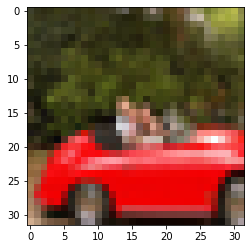

In [11]:
plt.imshow(img_t.permute(1, 2, 0)) #CxHxW -> HxWxC
plt.show()

In [13]:
# 데이터 정규화
imgs=torch.stack([img_t for img_t,_ in cifar10], dim=3) #img총 5000개이고 img_t.shape는 [3,32,32]
imgs.shape

torch.Size([3, 32, 32, 50000])

In [14]:
# 채널별 평균과 표준편차
imgs.view(3,-1).mean(dim=1), imgs.view(3,-1).std(dim=1)
# view(3,-1)은 세 채널은 유지하고 나머지 차원을 적절한 크기 하나로 합친다. 3x32x32이미지가 3x1024차원으로 바뀌고 각 채널 1024요소에 대해 계산

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

In [15]:
transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [16]:
#transforms.Compose를 이용해 여러 변환을 엮어서 사용가능하다.
cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

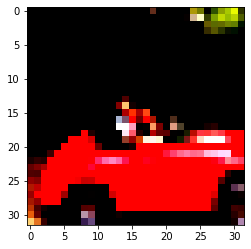

In [17]:
#많이 달리진 그림을 볼 수 있다.
img_t, _ = cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

# 7.2

In [18]:
label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [19]:
import torch.nn as nn
n_out=2 #피처 두개: 비행기거나 새거나

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, n_out))

#512개의 은닉된 피처를 골랐고 tanh를 이용해 은닉층을 구성했다.

#### 분류기 사용

- 로스함수: MSELoss 사용할 예정, 하지만 분류할 대상이 두가지인 특수한 경우라면 BCELoss를 사용해도 된다.

- 출력값이 카테고리이기 때문에 카테고리 변수를 표현하기 위해 원핫 인코딩으로 바꿔줘야 한다. 비행기: [1,0] 새: [0,1]

- 출력은 [비행기일 확률, 새일 확률] 형태로 나오기때문에 출력값의 요소가 가질 수 있는 값은 0 ~ 1이다.

- 출력을 확률로 표현하기 위해 다중분류에 쓰이는 Softmax함수를 사용한다. 소프트맥스는 벡터값을 받아 동일한 차원의 다른 벡터를 만드는데 값들이 확률로 표현된다.

#### 소프트맥스 표현식

$softmax(x_1,x_2)$= (${e^{x_1}}\over{e^{x_1}+e^{x_2}}$,${e^{x_2}}\over{e^{x_1}+e^{x_2}}$)


In [20]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [21]:
x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [22]:
#nn모듈을 이용해 구현가능하다. 소프트맥스 함수를 적용할 차원을 지정해줘야한다.
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [23]:
#모델의 끝에 소프트맥스 함수를 두어 신경망이 확률을 출력하게 만들었다.
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

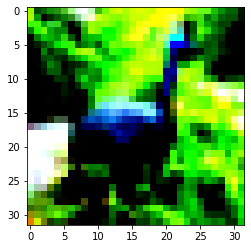

In [24]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [25]:
img_batch = img.view(-1).unsqueeze(0) #모델에 맞게 입력차원을 조정한다.
img_batch.shape

torch.Size([1, 3072])

In [26]:
out = model(img_batch)
out
#나온 확률은 훈련시키지 않고 신경망이 랜덤으로 초기화된 파라미터에 의해 추론된 값이다.

tensor([[0.5249, 0.4751]], grad_fn=<SoftmaxBackward0>)

In [27]:
#또한 결과값을 해석하기 위해 출력된 확률에 대해 argmax연산으로 레이블을 얻어낼 수 있다. 이 연산은 제일 높은 확률에 대한 인덱스이다.

_, index = torch.max(out, dim=1)

index

tensor([0])

여기서는 손실함수로 NLL함수를 사용한다.

정확하게 0 or 1이런 확률이 아닌 모든 경우에 벌점을 주는 대신 분류가 어긋날 경우에 벌점을 주는게 훨씬 더 중요하다.

여기서는 out이 소프트맥스의 출력값이고 클래스는 비행기일때 0이고 새일때 1이다. 정답클래스 out[class_index]와 관련된 확률을 극대화 할 필요가 있다. 정답클래스에대한 확률수치를 likelihood라 한다. 즉, __다른 클래스의 확률이 매우 높을때 값이 커지는 손실함수가 필요하다. 반대로 가능도가 다른 클래스보다 높으면 손실값은 낮아야한다. 확률값을 1까지로 올리는데 집착할 필요가 없다.__

이런식으로 동작하는 손실함수는 NLL(Negative Log Likelihood)함수이다.
NLL=-sum(log(out_i[c_i]))

데이터에 낮은 확률이 주어질 경우 무한으로 늘어나는 반면 확률이 0.5보다 커지는 경우는 완만하게 감소하는 경향을 보인다.
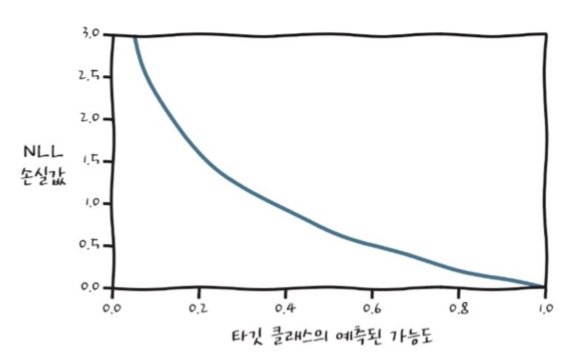

In [28]:
#softmax함수 사용하면 확률이 0에 가까울경우 문제가 되기 떄문에 Logsoftmax사용해 안정적인 계산을 한다.
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

#새를 예시로 테스트
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))
#MSE사용하면 훨씬 더 일찍 포화되어 미분해도 기울기 값이 작아 좋지 않은 예측을 하게 된다. MSE의 기울기는 잘못된 예측에 대한 소프트맥스 함수의 평탄화를 보상하기에 너무 작다.

tensor(0.8455, grad_fn=<NllLossBackward0>)

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label])) #브로드캐스팅 out: 1x2, torch.tensor([label]):1     
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 5.183293
Epoch: 1, Loss: 2.486770
Epoch: 2, Loss: 5.749059
Epoch: 3, Loss: 10.096677
Epoch: 4, Loss: 2.980667
Epoch: 5, Loss: 12.919665
Epoch: 6, Loss: 16.235716
Epoch: 7, Loss: 7.186924
Epoch: 8, Loss: 13.587884
Epoch: 9, Loss: 4.626205
Epoch: 10, Loss: 5.133543
Epoch: 11, Loss: 4.192498
Epoch: 12, Loss: 1.264740
Epoch: 13, Loss: 6.018458
Epoch: 14, Loss: 9.465184
Epoch: 15, Loss: 8.700088
Epoch: 16, Loss: 6.853026
Epoch: 17, Loss: 12.423616
Epoch: 18, Loss: 4.960280
Epoch: 19, Loss: 3.832187
Epoch: 20, Loss: 4.656030
Epoch: 21, Loss: 7.375816
Epoch: 22, Loss: 20.007507
Epoch: 23, Loss: 6.191201
Epoch: 24, Loss: 2.253193
Epoch: 25, Loss: 3.546602
Epoch: 26, Loss: 8.110438
Epoch: 27, Loss: 10.899882
Epoch: 28, Loss: 3.771224
Epoch: 29, Loss: 8.422433
Epoch: 30, Loss: 9.686367
Epoch: 31, Loss: 7.110418
Epoch: 32, Loss: 9.824324
Epoch: 33, Loss: 2.831800
Epoch: 34, Loss: 2.667467
Epoch: 35, Loss: 8.398068
Epoch: 36, Loss: 8.066061
Epoch: 37, Loss: 11.930254
Epoch: 38, Los

batch gradient descent: 배치사이즈가 n으로 파라미터 업데이트를 n개 단위로 한꺼번에 진행, 비효율적이지만 안정적임

stochastic gradient descent: 배치사이즈가 1로 파라미터 업데이트를 1개마다 진행, 실시간 업데이트가 가능하지만 불안정함

mini-batch gradient descent: 배치사이즈가 1 ~ n 사이로 업데이트를 n/batchsize 마다 진행

In [30]:
#torch.utils.data에는 미니배치의 데이터를 섞거나 구조화하는 작업을 돕는 DataLoader가 있음. 이를 활용해 샘플링을 다양한 전략을 통해 할수있다.

#데이터 로더가 데이터셋에서 개별 데이터 아이템을 샘플링하여 미니 배치를 구성하게한다.
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [31]:
#반복문 부분만 바꿔주면됨.

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size=imgs.shape[0] #img.shape:[64,3,32,32]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.673934
Epoch: 1, Loss: 0.120616
Epoch: 2, Loss: 0.179164
Epoch: 3, Loss: 0.356751
Epoch: 4, Loss: 0.204028
Epoch: 5, Loss: 0.299031
Epoch: 6, Loss: 0.268582
Epoch: 7, Loss: 1.476746
Epoch: 8, Loss: 0.025562
Epoch: 9, Loss: 0.083575
Epoch: 10, Loss: 0.082361
Epoch: 11, Loss: 0.013610
Epoch: 12, Loss: 0.191628
Epoch: 13, Loss: 0.137855
Epoch: 14, Loss: 0.014253
Epoch: 15, Loss: 0.245582
Epoch: 16, Loss: 0.648476
Epoch: 17, Loss: 0.101268
Epoch: 18, Loss: 0.011695
Epoch: 19, Loss: 0.454138
Epoch: 20, Loss: 0.122084
Epoch: 21, Loss: 0.083990
Epoch: 22, Loss: 0.137973
Epoch: 23, Loss: 0.007671
Epoch: 24, Loss: 0.038913
Epoch: 25, Loss: 0.592106
Epoch: 26, Loss: 0.408409
Epoch: 27, Loss: 0.464360
Epoch: 28, Loss: 0.064119
Epoch: 29, Loss: 0.064622
Epoch: 30, Loss: 0.206451
Epoch: 31, Loss: 0.126448
Epoch: 32, Loss: 0.291694
Epoch: 33, Loss: 0.195236
Epoch: 34, Loss: 0.044233
Epoch: 35, Loss: 0.457063
Epoch: 36, Loss: 0.175684
Epoch: 37, Loss: 0.475767
Epoch: 38, Loss: 0.140

In [32]:
#검증셋으로 테스트하기
val_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.946800


In [33]:
#모델에 계층을 더 추가하면 모델의 깊이나 용량이 늘어나게 된다.
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

#nn.LogSoftmax+nn.NLLLoss조합은 nn.CrossEntropyLoss와 동일하다.
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

위에 두 모델 사용 시 train_data로만 졍확도를 측정하면 99%에 가까우며 검증셋은 그에 비해 낮게 나오는데 과적합임을 알수있다.

NLLLoss는 크로스엔트로피를 계산하지만 입력으로 로그확률 예측을 받는다.

CrossEntropyLoss는 logits이라 부르는 점수를 입력으로 받는다. 하지만 여기서는 모델의 출력을 확률로 해석하지 못하는 단점이 하나 있어 출력을 다시 소프트맥스에 명시적으로 연결 할 필요가 있다.

In [34]:
#각 층마다 파라미터가 얼마나 있는지 확인해 볼 수 있다.
numel_list=[p.numel() for p in model.parameters() if p.requires_grad==True]

sum(numel_list),numel_list

#매우 많은 파라미터들이 있고 신경망을 픽셀수에 따라 확장 가능하는것은 어렵다.

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

# 7.4 연습문제

## 1 랜덤으로 잘라낸 이미지로 훈련시킨결과

In [36]:
torchvision_transform = transforms.Compose([
    transforms.Resize((300, 300)), 
    transforms.RandomCrop(224),
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=torchvision_transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,transform=torchvision_transform)

cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

batch_size=64

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size=imgs.shape[0] 
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Files already downloaded and verified
Epoch: 0, Loss: 0.499555
Epoch: 1, Loss: 0.540502
Epoch: 2, Loss: 0.565664
Epoch: 3, Loss: 0.498564
Epoch: 4, Loss: 0.571787
Epoch: 5, Loss: 0.531127
Epoch: 6, Loss: 0.588741
Epoch: 7, Loss: 0.478085
Epoch: 8, Loss: 0.488940
Epoch: 9, Loss: 0.701717
Epoch: 10, Loss: 0.748505
Epoch: 11, Loss: 0.533684
Epoch: 12, Loss: 0.397464
Epoch: 13, Loss: 0.746529
Epoch: 14, Loss: 0.590243
Epoch: 15, Loss: 0.435726
Epoch: 16, Loss: 0.434217
Epoch: 17, Loss: 0.536487
Epoch: 18, Loss: 0.547776
Epoch: 19, Loss: 0.423592
Epoch: 20, Loss: 0.372887
Epoch: 21, Loss: 0.649240
Epoch: 22, Loss: 0.373610
Epoch: 23, Loss: 0.552434
Epoch: 24, Loss: 0.633046
Epoch: 25, Loss: 0.379966
Epoch: 26, Loss: 0.555527
Epoch: 27, Loss: 0.408938
Epoch: 28, Loss: 0.751945
Epoch: 29, Loss: 0.787089
Epoch: 30, Loss: 0.499760
Epoch: 31, Loss: 0.388629
Epoch: 32, Loss: 0.726068
Epoch: 33, Loss: 0.788215
Epoch: 34, Loss: 0.459037
Epoch: 35, Loss: 0.414062
Epoch: 36, Loss: 0.529173
Epoch: 37,

In [37]:
val_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.830000


## 2 손실함수를 MSE로 한 결과

In [50]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

n_epochs = 100

batch_size=64

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size=imgs.shape[0] 
        outputs = model(imgs.view(batch_size, -1))
        target_onehot = torch.zeros(labels.shape[0], 2)
        target_onehot.scatter_(1, labels.unsqueeze(1), 1.0)
        loss = loss_fn(outputs, target_onehot)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.199236
Epoch: 1, Loss: 0.212649
Epoch: 2, Loss: 0.106944
Epoch: 3, Loss: 0.169798
Epoch: 4, Loss: 0.176466
Epoch: 5, Loss: 0.176119
Epoch: 6, Loss: 0.163146
Epoch: 7, Loss: 0.158108
Epoch: 8, Loss: 0.159327
Epoch: 9, Loss: 0.203156
Epoch: 10, Loss: 0.134165
Epoch: 11, Loss: 0.176018
Epoch: 12, Loss: 0.220141
Epoch: 13, Loss: 0.108576
Epoch: 14, Loss: 0.188219
Epoch: 15, Loss: 0.215745
Epoch: 16, Loss: 0.168514
Epoch: 17, Loss: 0.202423
Epoch: 18, Loss: 0.293280
Epoch: 19, Loss: 0.171472
Epoch: 20, Loss: 0.164985
Epoch: 21, Loss: 0.258642
Epoch: 22, Loss: 0.119984
Epoch: 23, Loss: 0.143926
Epoch: 24, Loss: 0.156519
Epoch: 25, Loss: 0.133814
Epoch: 26, Loss: 0.109938
Epoch: 27, Loss: 0.151505
Epoch: 28, Loss: 0.159288
Epoch: 29, Loss: 0.195506
Epoch: 30, Loss: 0.197743
Epoch: 31, Loss: 0.093340
Epoch: 32, Loss: 0.163919
Epoch: 33, Loss: 0.150262
Epoch: 34, Loss: 0.104306
Epoch: 35, Loss: 0.178043
Epoch: 36, Loss: 0.143590
Epoch: 37, Loss: 0.116413
Epoch: 38, Loss: 0.146

In [51]:
val_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.780300


# 3 신경망을 간소화시켜 훈련한 결과


In [39]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),)

loss_fn = nn.CrossEntropyLoss()

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size=imgs.shape[0] 
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.703257
Epoch: 1, Loss: 0.687391
Epoch: 2, Loss: 0.737966
Epoch: 3, Loss: 0.753162
Epoch: 4, Loss: 0.705879
Epoch: 5, Loss: 0.696501
Epoch: 6, Loss: 0.740798
Epoch: 7, Loss: 0.752510
Epoch: 8, Loss: 0.705919
Epoch: 9, Loss: 0.703095
Epoch: 10, Loss: 0.689697
Epoch: 11, Loss: 0.694667
Epoch: 12, Loss: 0.710165
Epoch: 13, Loss: 0.700303
Epoch: 14, Loss: 0.673018
Epoch: 15, Loss: 0.651697
Epoch: 16, Loss: 0.783261
Epoch: 17, Loss: 0.680605
Epoch: 18, Loss: 0.674199
Epoch: 19, Loss: 0.706090
Epoch: 20, Loss: 0.734616
Epoch: 21, Loss: 0.708005
Epoch: 22, Loss: 0.686877
Epoch: 23, Loss: 0.791528
Epoch: 24, Loss: 0.741197
Epoch: 25, Loss: 0.616898
Epoch: 26, Loss: 0.708465
Epoch: 27, Loss: 0.729681
Epoch: 28, Loss: 0.690270
Epoch: 29, Loss: 0.667544
Epoch: 30, Loss: 0.713360
Epoch: 31, Loss: 0.684852
Epoch: 32, Loss: 0.700498
Epoch: 33, Loss: 0.722965
Epoch: 34, Loss: 0.724621
Epoch: 35, Loss: 0.717498
Epoch: 36, Loss: 0.667552
Epoch: 37, Loss: 0.700232
Epoch: 38, Loss: 0.711

In [40]:
val_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.498200
